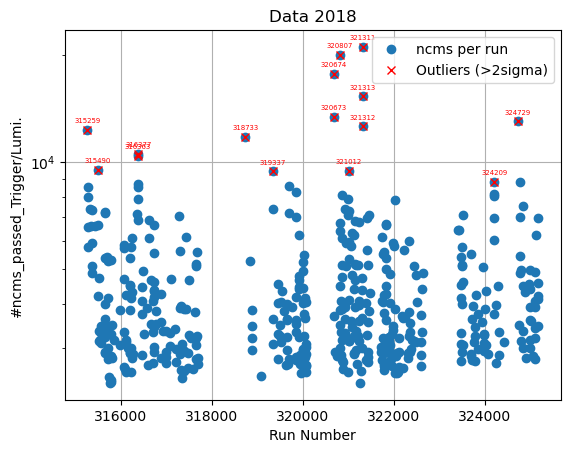

Run numbers considered as outliers (2 times std deviation from the mean): (315259, 315490, 316363, 316377, 318733, 319337, 320673, 320674, 320807, 321012, 321311, 321312, 321313, 324209, 324729)


In [24]:
import matplotlib.pyplot as plt
import numpy as np

def get_run_and_recorded(filename):
    run_list = []
    intLumi_list = []
    ncms_list = []
    with open(filename, 'r') as file:
        next(file)  # Skip the header line
        for line in file:
            parts = line.strip().split(',')
            run = int(parts[0].split(':')[0])
            event = int(parts[2])
            recorded = float(parts[-1])
            run_list.append(run)
            intLumi_list.append(recorded)
            ncms_list.append(event)
    return run_list, intLumi_list, ncms_list

filename = "out_leagcy18_DST_HT410.txt"
runs, intLumis, ncms = get_run_and_recorded(filename)

event_ratios = [event / intLumi for event, intLumi in zip(ncms, intLumis)]
mean_ratio = np.mean(event_ratios)
std_ratio = np.std(event_ratios)

outliers = [(run, ratio) for run, ratio in zip(runs, event_ratios) if abs(ratio - mean_ratio) > 2 * std_ratio]

plt.plot(runs, event_ratios, marker='o', linestyle='', label='ncms per run')
outlier_runs, outlier_ratios = zip(*outliers)
plt.plot(outlier_runs, outlier_ratios, marker='x', color='red', linestyle='', label='Outliers (>2sigma)')

for run, ratio in outliers:
    plt.annotate(str(run), (run, ratio), fontsize=5, color='red', xytext=(0, 5), textcoords='offset points', ha='center')

plt.xlabel('Run Number')
plt.ylabel('#ncms_passed_Trigger/Lumi.')
plt.yscale('log')
plt.title('Data 2018')
plt.legend()
plt.grid(True)
plt.show()

print("Run numbers considered as outliers (2 times std deviation from the mean):", outlier_runs)
